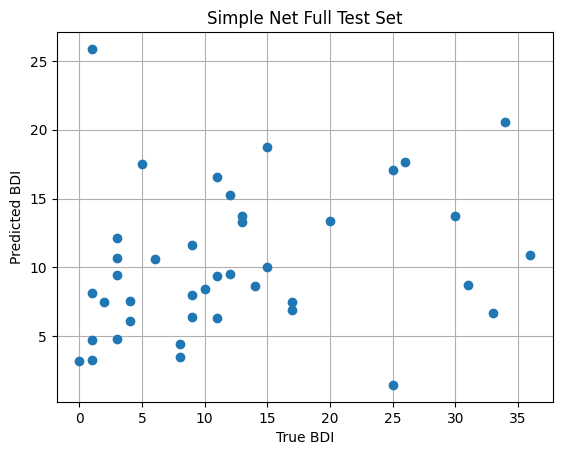

Pearson Correlation Coefficient: 0.23363634178157472
P value:  0.14151510013394406
R-squared: -0.07413059041838554
Mean Absolute Error (MAE): 7.622629165649414

LM Statistic: 0.055406682276186836
LM Test p-value: 0.8139089644842394
F-Statistic: 0.052775236818287614
F-Test p-value: 0.8195033017306703


In [5]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error    
from sklearn.metrics import r2_score
import statsmodels.api as sm
import sys
import os
sys.path.append('../')
from utils import project_root

x_data = []
y_data = []

root = project_root() 
with open(os.path.join(root, 'train_simple_net.txt'), 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    next(csv_reader)  # Skip the header row if present

    for row in csv_reader:
        x_data.append(float(row[1].strip()))  # Assuming column 2 contains x values
        y_data.append(float(row[2].strip()))  # Assuming column 3 contains y values

# Plot the data
plt.plot(x_data, y_data, 'o')  # 'o' for scatter plot markers
plt.xlabel('True BDI')
plt.ylabel('Predicted BDI')
plt.title(f'Simple Net Full Test Set')
plt.grid(True)
plt.show()

# Assuming x_data and y_data contain the extracted x and y values from the CSV/TXT file

# Calculate Pearson correlation coefficient
corr_coeff, p = pearsonr(x_data, y_data)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(x_data, y_data)

r2 = r2_score(x_data, y_data)

# Print the results
print("Pearson Correlation Coefficient:", corr_coeff)
print('P value: ', p)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)

print()
# Fit the regression model
X = sm.add_constant(x_data)  # Add a column of ones for the intercept
model = sm.OLS(y_data, X)
results = model.fit()
y_hat = results.predict(X)

# Calculate the residuals
residuals = y_data - y_hat

# Perform the Breusch-Pagan test
het_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)

# Extract the test statistics and p-values
lm, lm_p_value, fvalue, f_p_value = het_test[:4]

# Print the results
print(f"LM Statistic: {lm}")
print(f"LM Test p-value: {lm_p_value}")
print(f"F-Statistic: {fvalue}")
print(f"F-Test p-value: {f_p_value}")